In [166]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [167]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")
        

In [168]:
datestring = '201610'
getCitiBikeCSV(datestring)
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

file in place, you can continue
201501-citibike-tripdata.csv  201710-citibike-tripdata.zip
201501-citibike-tripdata.zip  -citibike-tripdata.csv.zip
201610-citibike-tripdata.csv  edesigdata.csv
201610-citibike-tripdata.zip  task3_data.txt
201708-citibike-tripdata.zip


In [169]:
df.columns

Index(['Trip Duration', 'Start Time', 'Stop Time', 'Start Station ID',
       'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'End Station ID', 'End Station Name',
       'End Station Latitude', 'End Station Longitude', 'Bike ID', 'User Type',
       'Birth Year', 'Gender'],
      dtype='object')

# IDEA:

My hypothesis is, that during weekdays, when people commute to work, majority of customers will be of a type "subscriber" as they would use it as their usual commute to work. I will use the data from October 2015, as it is les slikely in that month that people go on vacation.

# Null hypothesis:
During weekdays, number of subscriber users is lower or equal to the number of other users of citiBike. Significance level: 0.05

# Alternative hypothesis:
During weekdays, number of subscriber users is higher than the number of other users of citiBike. Significance level: 0.05

In [170]:

df.drop(['Trip Duration', 'Stop Time', 'Start Station ID',
       'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'End Station ID', 'End Station Name',
       'End Station Latitude', 'End Station Longitude', 'Bike ID',
       'Birth Year', 'Gender'],
        axis=1, inplace=True)
df['date'] = pd.to_datetime(df['Start Time'])
df['Weekday'] = df['date'].dt.weekday_name
df.drop(['Start Time','date'],axis=1,inplace=True)
# removing Saturday and Sunday
df = df[df['Weekday'] != 'Sunday']
df = df[df['Weekday'] != 'Saturday']
df.head()

,User Type,Weekday
80834,Customer,Monday
80835,Subscriber,Monday
80836,Subscriber,Monday
80837,Subscriber,Monday
80838,Subscriber,Monday


In [171]:
#split by customer type

df_g1 = df.groupby('Weekday').count()
df_g1.columns=['All users']
df_g1['Subscribers']=df[df['User Type']=='Subscriber'].groupby('Weekday').count()
df_g1['Customers']=df[df['User Type']=='Customer'].groupby('Weekday').count()

df_g1

,All users,Subscribers,Customers
Weekday,,,
Friday,211768,195606,16162
Monday,273670,249235,24435
Thursday,211863,197462,14401
Tuesday,237892,221772,16120
Wednesday,243008,225448,17560


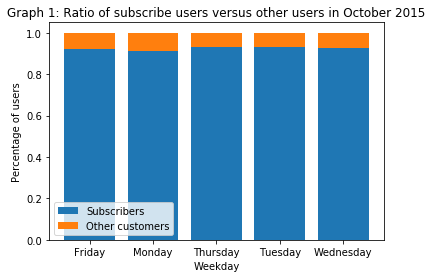

In [172]:
import numpy as np
import matplotlib.pyplot as plt

df_g1['S ratio']=df_g1['Subscribers']/df_g1['All users']
df_g1['C ratio']=df_g1['Customers']/df_g1['All users']

p1=plt.bar(df_g1.index, df_g1['S ratio'])
p2=plt.bar(df_g1.index, df_g1['C ratio'], bottom=df_g1['S ratio'])

plt.xlabel('Weekday')
plt.ylabel('Percentage of users')
plt.title('Graph 1: Ratio of subscribe users versus other users in October 2015')
plt.legend((p1[0], p2[0]), ('Subscribers', 'Other customers'))

plt.show()